# Laboratório 3

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo das semanas três e quatro da disciplina.

A ideia principal é que vamos trabalhar um pouco mais com os novos classificadores vistos, métricas de avaliação e seleção de hiperparâmetros.

Assim como nos Laboratório 01 e 02, vamos utilizar o conjunto de dados ``College``, disponível [aqui](https://www.statlearning.com/resources-python).

Só para lembrar, o conjunto de dados contém informações sobre várias faculdades e universidades dos Estados Unidos. O significado de cada informação não é essencial para este exercício. Mas alguns exemplos de informações contidas no conjunto de dados são:

- `Private`: Indica se a instituição é pública ou privada
- `Apps`: Número de aplicações recebidas
- `Accept`: Número de aplicações aceitas
- `Enroll`: Número de novos alunos matriculados
- `Top10perc`: Percentual de novos alunos do top 10% de turmas do ensino médio
- `Top25perc`: Percentual de novos alunos do top 25% de turmas do ensino médio
- ...

## Obtenção dos dados

Para obter o conjunto de dados, execute o comando abaixo. O arquivo ``College.csv`` será diretamente acessível por meio desse *notebook*.

**Observação:** caso a sessão do *notebook* seja interrompida, será necessário baixar o conjunto de dados novamente.

In [65]:
import requests

url = "https://www.statlearning.com/s/College.csv"
response = requests.get(url)

with open("College.csv", "wb") as file:
    file.write(response.content)

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Leitura e Preparação dos Dados [Não vale pontos, mas é necessário]

Repita a Parte I do Laboratório 01. Ou seja, prepare o conjunto de dados seguindo as instruções dos Itens 1.1 a 1.7 daquele Laboratório.

In [66]:
# Escreva sua resposta aqui
import pandas as pd
df=pd.read_csv('College.csv')
def load_data(df):
    df = df.rename(columns={"Unnamed: 0": "College"})
    df = df.set_index("College")
    df['Good School'] = df['Top10perc'].apply(lambda x: 1 if x > 25 else 0)
    df['Private'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)
    y=df['Good School']
    df=df.drop(columns=['Top10perc','Top25perc','Good School'])
    return y,df
y,df = load_data(df)
df

,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,0,2197,1515,543,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1,1959,1805,695,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,1,2097,1915,695,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


Ao final da preparação, o *Data Frame* deve se parecer com o mostrado abaixo.

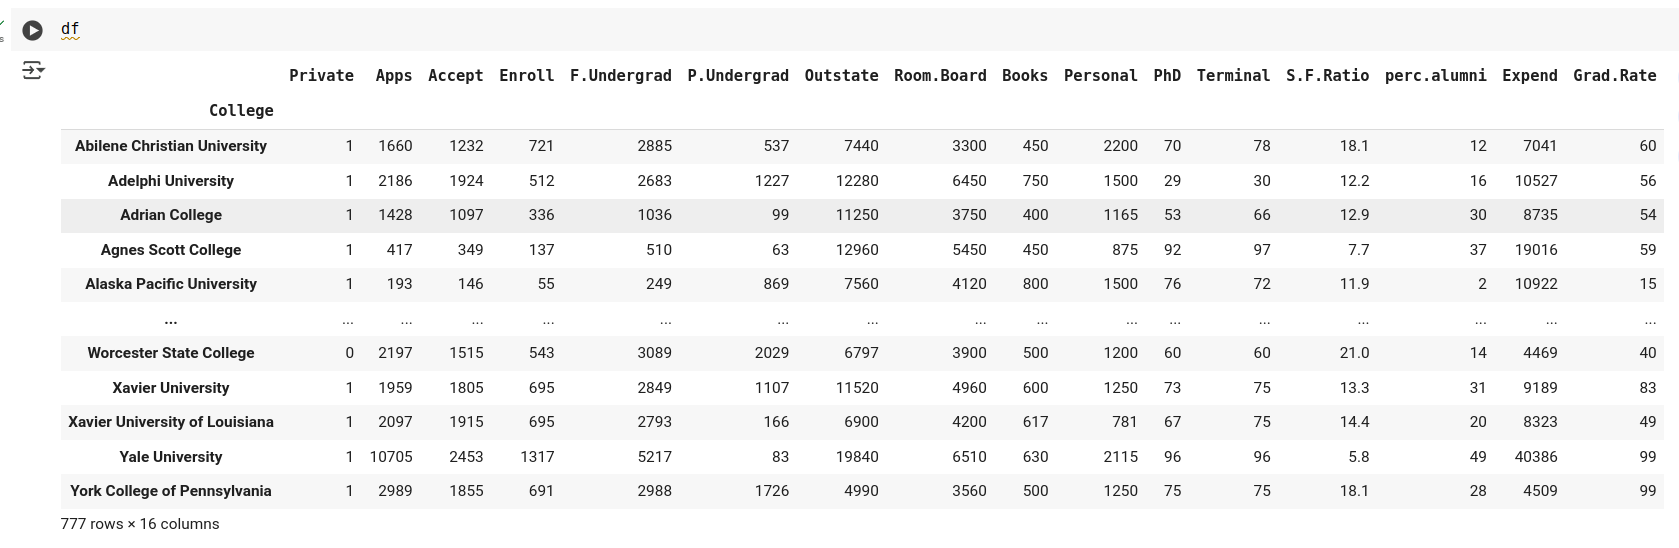

## Parte 1: Comparando os Classificadores [50 pontos - Todos os itens têm o mesmo valor]

Assim como nos Laboratórios 01 e 02, a tarefa de predição aqui será prever a variável `y` em função dos dados contidos no *Data Frame* resultante na parte anterior do laboratório.

Ou seja, o objetivo é criar um modelo para classificar se uma instituição de ensino é uma `Good School` ou não.

### Divisão em conjuntos de treinamento e teste.

Divida o conjunto de dados em porções distintas para treinamento e avaliação do classificador.

25% do conjunto de dados deve ser retido para testes.

Essa mesma divisão deverá ser utilizada no restante do laboratório.

O Código fornecido abaixo realiza essa separação para você e não deve ser alterado.

In [67]:
# não modifique esse código.

from sklearn.model_selection import train_test_split

X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Item 1.1

Use os Classificadores [KNN](https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) e [Floresta Aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) no conjunto de dados acima. Ou seja:
1. Treine os seis classificadores em `X_train` e `y_train`. Nesse momento, você **não** deve aplicar nenhuma transformação nos dados (e.g. padronização ou reescala). Além disso, não forneça nenhum parâmetro aos classificadores (todos os hiperparâmetros devem ser os padrões da `scikit-learn`);
2. Use cada um dos classificadores para prever os rótulos dos elementos do conjunto de teste, `X_test` (nessa etapa, não é necessário avaliar os classificadores).

In [68]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


class ClassifierOptimizer:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.scaler = None
        self.scaled = False # Flag para indicar se os dados foram escalados
        self.cv=5 # Número de folds para validação cruzada
        # Classificadores a serem otimizados
        self.classifiers = {
        'KNN': KNeighborsClassifier(),
        'LogisticRegression': LogisticRegression(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'NaiveBayes': GaussianNB(),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42)
        }
        # Parâmetros a serem testados para cada classificador
        self.param_grids = {
            'KNN': {'n_neighbors': np.arange(1, 31)},
            'LogisticRegression': {'C': np.logspace(-3, 3, 30)},
            'DecisionTree': {'max_depth': np.arange(2, 31, 2)},
            'NaiveBayes': {'var_smoothing': np.logspace(-11, 11, 30)},
            'AdaBoost': {'n_estimators': [10, 100, 500, 1000]},
            'RandomForest': {
                'n_estimators': [10, 100, 500, 1000],
                'max_depth': np.arange(2, 31, 2)
            }
        }
        self.best_estimators = {}
        self.best_hyperparameters = {}
        self.predictions_optimized = {}
        self.class_predictions = {}

    def scale_data(self):
        """
        Aplica o MinMaxScaler aos dados de treino e teste.
        """
        self.scaler = MinMaxScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        self.scaled = True # Flag para indicar que os dados foram escalados
        print("Dados escalados com sucesso!")

    def optimize_classifiers(self):
        """
        Otimiza os classificadores usando GridSearchCV.
        """
        X_train = self.X_train_scaled if self.scaled else self.X_train # Usa dados escalados se disponíveis, caso contrário usa dados padrão
        for classifier_name, classifier in self.classifiers.items():
            print(f"\nOtimizando {classifier_name}...")
            # GridSearchCV para encontrar os melhores hiperparâmetros
            grid_search = GridSearchCV(
                classifier, 
                self.param_grids[classifier_name], 
                cv=self.cv, 
                n_jobs=-1, # Usa todos os núcleos do processador
                verbose=1 # Mostra mensagens de progresso
            )
            grid_search.fit(X_train, self.y_train)
            
            self.best_estimators[classifier_name] = grid_search.best_estimator_# Salva os melhores classificadores treinados de cada tipo de classificador
            self.best_hyperparameters[classifier_name] = grid_search.best_params_# Salva os melhores hiperparâmetros
            print(f"Melhores parâmetros para {classifier_name}: {grid_search.best_params_}")

    def print_best_hyperparameters(self):
        """
        Imprime os melhores hiperparâmetros encontrados para cada classificador.
        """
        if not self.best_hyperparameters:
            raise ValueError("Chame optimize_classifiers() antes de imprimir os hiperparâmetros.")
        
        print("\nMelhores Hiperparâmetros:")
        for classifier_name, params in self.best_hyperparameters.items():
            print(f"{classifier_name}: {params}")

    def evaluate_classifiers(self):
        """
        Avalia os classificadores nos dados de teste.
        """
        X_train = self.X_train_scaled if self.scaled else self.X_train
        X_test = self.X_test_scaled if self.scaled else self.X_test
        
        if not self.best_estimators: # Se os classificadores não foram otimizados (best_estimators vazio)
            print("Usando classificadores padrão (sem otimização).")
            self.best_estimators = self.classifiers # Usa os classificadores padrão
            for classifier_name, classifier in self.classifiers.items():
                classifier.fit(X_train, self.y_train)
        
        for classifier_name, best_estimator in self.best_estimators.items(): # faz previsões para cada classificador
            y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]
            self.predictions_optimized[classifier_name] = y_pred_proba
            
            y_pred = best_estimator.predict(X_test)
            self.class_predictions[classifier_name] = y_pred

    def print_classification_reports(self):
        """
        Imprime relatórios de classificação para todos os classificadores.
        """
        if not self.class_predictions:
            raise ValueError("Chame evaluate_classifiers() antes de gerar relatórios.")
        
        for classifier_name, y_pred in self.class_predictions.items():
            print(f"\n{classifier_name}\n{'-'*30}")
            print(classification_report(self.y_test, y_pred))

    def print_auc_scores(self):
        """
        Imprime as métricas AUC para todos os classificadores.
        """
        if not self.predictions_optimized:
            raise ValueError("Chame evaluate_classifiers() antes de calcular AUC.")
        
        for classifier_name, y_pred_proba in self.predictions_optimized.items():
            fpr, tpr, _ = roc_curve(self.y_test, y_pred_proba) # Calcula FPR e TPR
            roc_auc = auc(fpr, tpr) # Calcula AUC
            print(f"AUC ({classifier_name}): {roc_auc:.4f}")

    def plot_roc_curve(self):
        """
        Plota todas as curvas ROC em um único gráfico.
        """
        if not self.predictions_optimized:
            raise ValueError("Chame evaluate_classifiers() antes de plotar curvas ROC.")
        
        plt.figure(figsize=(10, 8))
        for classifier_name, y_pred_proba in self.predictions_optimized.items():
            fpr, tpr, _ = roc_curve(self.y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
        plt.title('Curvas ROC Comparativas')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.legend(loc='lower right')
        plt.show()

optimizer = ClassifierOptimizer(X_train, y_train, X_test, y_test)
optimizer.evaluate_classifiers()


Usando classificadores padrão (sem otimização).


c:\Users\f\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Item 1.2

Para cada classificador treinado, imprima o [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do classificador relativo aos rótulos preditos no conjunto de teste.

In [69]:
optimizer.print_classification_reports()


KNN
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       107
           1       0.75      0.67      0.71        88

    accuracy                           0.75       195
   macro avg       0.75      0.74      0.74       195
weighted avg       0.75      0.75      0.75       195


LogisticRegression
------------------------------
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       107
           1       0.75      0.61      0.68        88

    accuracy                           0.73       195
   macro avg       0.74      0.72      0.72       195
weighted avg       0.74      0.73      0.73       195


DecisionTree
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       107
           1       0.75      0.70      0.73        88

    accuracy                           0.76       

### Item 1.3

Com base nos resultados do item anterior, há algum classificador que se destaca?

Lembre, é importante observar todas as métricas, não apenas a acurácia.

**Resposta:** [Todos os classificadores tiveram uma performance aceitável, os que mais se destacam são RandomForest e AdaBoost, que mostraram mario acurácia e f1-score]

### Item 1.4

Faça uma única figura contendo a [Curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) dos seis classificadores treinados.

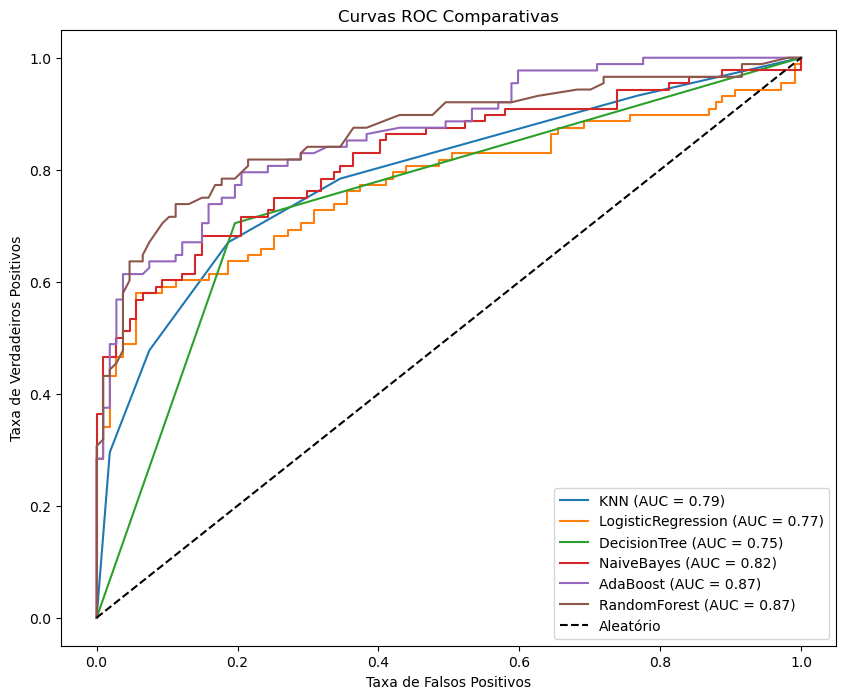

In [70]:
# Escreva sua resposta aqui
optimizer.plot_roc_curve()

### Item 1.5

Com base nos resultados da Figura do Item 1.4, há classificadores que se destacam?

**Resposta:** [Os que mais se destacam são RandomForest e AdaBoost, com AUC mais próximo de 1]

### Item 1.6

Compute e imprima a [Área sob a Curva Roc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) para os seis classificadores.

In [71]:
# Escreva sua resposta aqui
optimizer.print_auc_scores()

AUC (KNN): 0.7908
AUC (LogisticRegression): 0.7741
AUC (DecisionTree): 0.7541
AUC (NaiveBayes): 0.8238
AUC (AdaBoost): 0.8652
AUC (RandomForest): 0.8666


### Item 1.7

Com base nos resultados dos Itens 1.2 e 1.6, os valores de AUC estão de acordo com sua interpretação das métricas de avaliação e das Curva ROC?

**Resposta:** [Sim, os que mais se destacam continuam sendo RandomForest e AdaBoost, com AUC mais próximo de 1]

### Item 1.8

Repita o experimento dos Itens 1.1, 1.2, 1.4 e 1.6.

No entanto, dessa vez, você deve aplicar a transformação por reescala nos dados. Lembre, o `scaler` deve ser ajustado ao conjunto de treinamento e posteriormente aplicado ao conjunto de teste.

**Atenção:**
- O conjunto de treinamento transformado deve ser armazenado na variável `X_train_scaled`.
- Similarmente, o conjunto de teste transformado, deve ser armazenado na variável `X_test_scaled`.

Dados escalados com sucesso!
Usando classificadores padrão (sem otimização).

KNN
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       107
           1       0.85      0.60      0.71        88

    accuracy                           0.77       195
   macro avg       0.80      0.76      0.76       195
weighted avg       0.79      0.77      0.77       195


LogisticRegression
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       107
           1       0.79      0.69      0.74        88

    accuracy                           0.78       195
   macro avg       0.78      0.77      0.77       195
weighted avg       0.78      0.78      0.78       195


DecisionTree
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       107
           1       0.75     

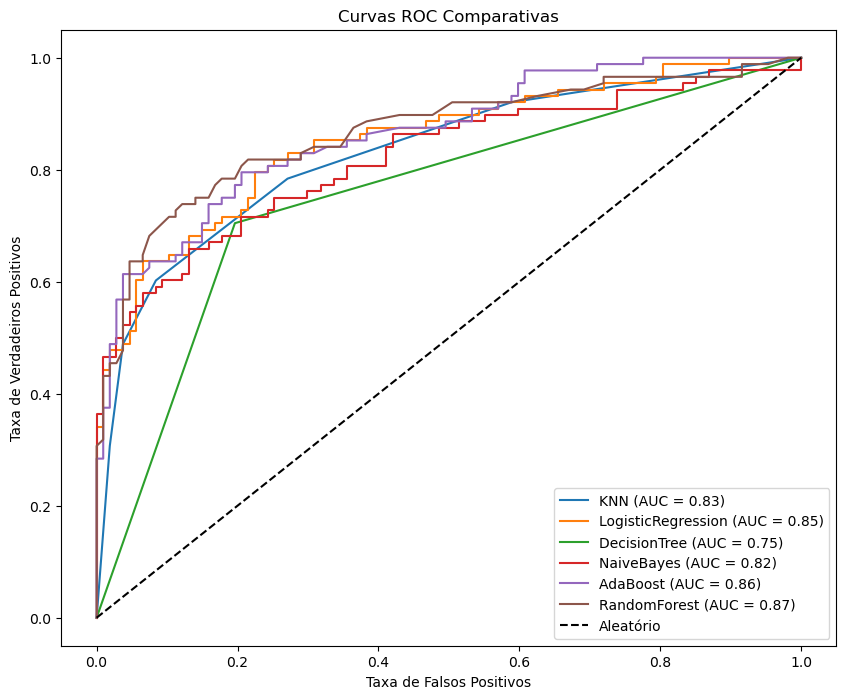

AUC (KNN): 0.8310
AUC (LogisticRegression): 0.8531
AUC (DecisionTree): 0.7541
AUC (NaiveBayes): 0.8216
AUC (AdaBoost): 0.8648
AUC (RandomForest): 0.8670


In [72]:
# Escreva sua resposta aqui
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
optimizer = ClassifierOptimizer(X_train, y_train, X_test, y_test)
optimizer.scale_data()
optimizer.evaluate_classifiers()
optimizer.print_classification_reports()
optimizer.plot_roc_curve()
optimizer.print_auc_scores()


### Item 1.9

Com base nos resultados do Item 1.8, para o conjunto de dados utilizado e para os classificadores treinados, há evidência de que a transformação por reescala impactou significativamente os resultados?

**Resposta:** [Todos tiveram uma melhora nos resultados obtidos, em especial o LogisticRegression que apresentou maior crescimento nas métricas de validação]

## Parte 2 - Seleção de Hiperparâmetros [50 pontos - Todos os itens têm o mesmo valor]

Na segunda parte do Laboratório, vamos praticar um pouco sobre como escolher hiperparâmetros sem correr o risco de gerar *overfitting*.

### Item 2.1

Para isso, você deve utilizar o módulo [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Lembre, nenhuma informação do conjunto de teste deve ser utilizada na fase de treinamento e validação cruzada.

Você deve considerar os seis classificadores vistos até o momento (e já utilizados neste Laboratório). Para cada um deles, considere os seguintes conjuntos de hiperparâmetros candidatos:
- $k$ do **KNN** -- $k \in \{1, 2, 3, \dots, 30\}$.
- $C$ da **Regressão Logística** -- comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 30 valores espaçados exponencialmente de 0.001 a 1000.
- Profundidade da **Árvore de Decisão** -- considere os valores em $\{2, 4, 6, \dots, 30\}$.
- `var_smoothin` do **Gaussian Naive Bayes** -- comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 30 valores espaçados exponencialmente de $10^{-11}$ a $10^{11}$.
- número de estimadores do **AdaBoost** -- considere os valores $\{10, 100, 500, 1000\}$.
- número de estimadores e profundidade máxima da **Floresta Aleatória** -- considere os valores $\{10, 100, 500, 1000\}$ para o número de estimadores e $\{2, 4, 6, \dots, 30\}$ para profundidade máxima.

Nesse momento, vocês devem realizar a validação cruzada e treinamento dos modelos.

**Observação:** Na Parte 2 do Laboratório, vocês devem usar os dados transformados por reescala (i.e., `X_train_scaled` e `X_test_scaled`).

In [73]:
# Escreva sua resposta aqui
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
optimizer = ClassifierOptimizer(X_train, y_train, X_test, y_test)
optimizer.scale_data()
optimizer.optimize_classifiers()


Dados escalados com sucesso!

Otimizando KNN...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros para KNN: {'n_neighbors': 10}

Otimizando LogisticRegression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros para LogisticRegression: {'C': 385.6620421163472}

Otimizando DecisionTree...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Melhores parâmetros para DecisionTree: {'max_depth': 4}

Otimizando NaiveBayes...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros para NaiveBayes: {'var_smoothing': 0.012689610031679182}

Otimizando AdaBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros para AdaBoost: {'n_estimators': 100}

Otimizando RandomForest...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Melhores parâmetros para RandomForest: {'max_depth': 6, 'n_estimators': 500}


### Item 2.2

Imprima os melhores hiperparâmetros, encontrados pelo processo de validação cruzada, para cada classificador.

In [74]:
# Escreva sua resposta aqui
optimizer.print_best_hyperparameters()


Melhores Hiperparâmetros:
KNN: {'n_neighbors': 10}
LogisticRegression: {'C': 385.6620421163472}
DecisionTree: {'max_depth': 4}
NaiveBayes: {'var_smoothing': 0.012689610031679182}
AdaBoost: {'n_estimators': 100}
RandomForest: {'max_depth': 6, 'n_estimators': 500}


### Item 2.3

Utilize os modelos treinados no Item 2.1 para prever os rótulos dos elementos do conjunto de teste (`X_test_scaled`).

Após isso, imprima o `classification_report` de cada classificador.

In [75]:
# Escreva sua resposta aqui
optimizer.evaluate_classifiers()

In [76]:
optimizer.print_classification_reports()


KNN
------------------------------
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       107
           1       0.88      0.59      0.71        88

    accuracy                           0.78       195
   macro avg       0.81      0.76      0.77       195
weighted avg       0.80      0.78      0.77       195


LogisticRegression
------------------------------
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.78      0.73      0.75        88

    accuracy                           0.78       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.78      0.78      0.78       195


DecisionTree
------------------------------
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       107
           1       0.85      0.57      0.68        88

    accuracy                           0.76       

### Item 2.4

Faça uma única figura contendo a [Curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) dos seis classificadores treinados no Item 2.1.

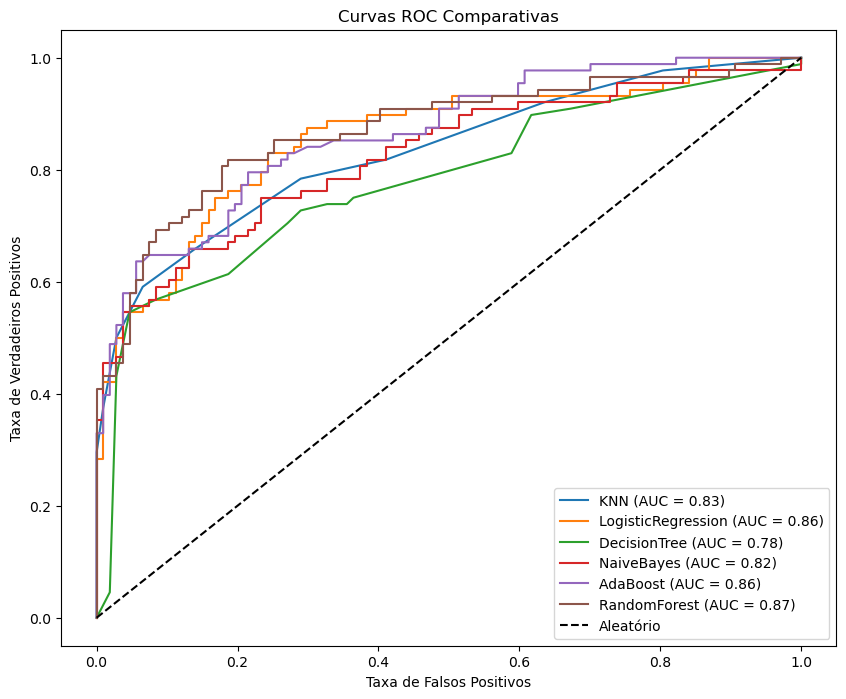

In [77]:
# Escreva sua resposta aqui
optimizer.plot_roc_curve()

### Item 2.5

Compute e imprima a [Área sob a Curva Roc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) para os seis classificadores.

In [78]:
# Escreva sua resposta aqui
optimizer.print_auc_scores()

AUC (KNN): 0.8323
AUC (LogisticRegression): 0.8559
AUC (DecisionTree): 0.7796
AUC (NaiveBayes): 0.8244
AUC (AdaBoost): 0.8641
AUC (RandomForest): 0.8698


### Item 2.6

Com base nos resultados da Parte 2, para o conjunto de dados utilizado e para os classificadores treinados, há evidência de que a seleção de hiperparâmetros (com validação cruzada) impactou significativamente os resultados?

**Resposta:** [Sim, a otimização de hiperparâmetros com validação cruzada impactou significativamente os resultados, principalmente para modelos como KNN, Logistic Regression e Decision Tree, que mostraram melhorias consideráveis. Para outros modelos como Naive Bayes, a mudança foi mínima, e para AdaBoost a performance diminuiu ligeiramente, mas a maioria dos modelos se beneficiou da otimização de parâmetros.]